## Invalid Sample Detection

In [39]:
from scipy import signal

import matplotlib.pyplot as plt
import numpy             as np
import wfdb
import scipy.fftpack
import scipy

%matplotlib inline
%config IPCompleter.greedy=True

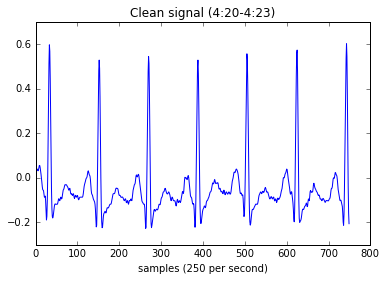

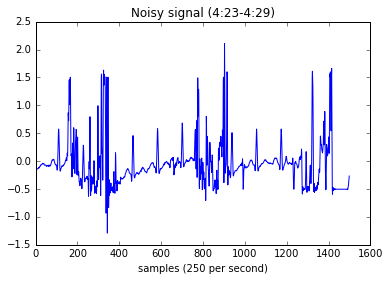

In [104]:
# There is a noisy section of this signal - between 4:20 and 4:25 (260 and 265 seconds)
sig, fields=wfdb.rdsamp('sampledata/a103l')
fs = 250
clean_start = 260
clean_end = 263
clean_duration = clean_end - clean_start

noisy_start = 263
noisy_end = 269
noisy_duration = noisy_end - noisy_start

clean_signal = sig[clean_start*fs:clean_end*fs,:]
noisy_signal = sig[noisy_start*fs:noisy_end*fs,:]

plt.plot(clean_signal[:,0],'b-')
plt.title('Clean signal (4:20-4:23)')
plt.xlabel('samples (250 per second)')
plt.show()

plt.title('Noisy signal (4:23-4:29)')
plt.plot(noisy_signal[:,0],'b-')
plt.xlabel('samples (250 per second)')
plt.show()

To check if the signal amplitude in the range 70-90 Hz is outsize the limits (> 0.005 mV), we look at the fft of the signal:  

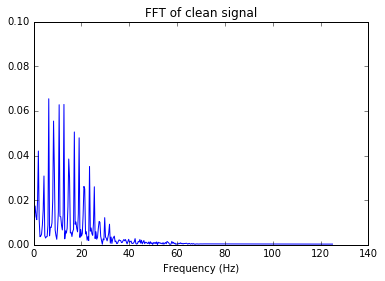

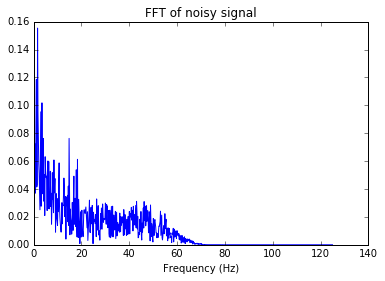

In [129]:
def get_signal_fft(signal, signal_duration): 
    # Number of samplepoints
    N = signal_duration * fs
    # sample spacing
    T = 1.0 / fs
    
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
    signal_fft = scipy.fftpack.fft(signal[:,0])
    
    return (xf, 2.0/N * np.abs(signal_fft[:N/2]))
    
def plot_signal_fft(signal_xf, signal_fft, title=""):
    fig, ax = plt.subplots()
    ax.plot(signal_xf, signal_fft)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.show()

clean_xf, clean_signal_fft = get_signal_fft(clean_signal, clean_duration)
noisy_xf, noisy_signal_fft = get_signal_fft(noisy_signal, noisy_duration)
plot_signal_fft(clean_xf, clean_signal_fft, "FFT of clean signal")
plot_signal_fft(noisy_xf, noisy_signal_fft, "FFT of noisy signal")

In [110]:
noisy_amplitude_limit = 0.005

def get_fft_amplitude(signal_fft, frequency, signal_duration): 
    return signal_fft[frequency * signal_duration]

def check_frequency_amplitude_limits(signal_fft, signal_duration): 
    for frequency in range(70, 91): 
        if get_fft_amplitude(signal_fft, frequency, signal_duration) > noisy_amplitude_limit: 
            return "Invalid data"
    return "Valid data"
    
print check_frequency_amplitude_limits(clean_signal_fft, clean_signal_duration)
print check_frequency_amplitude_limits(noisy_signal_fft, noisy_signal_duration)

375 750
Valid data
Valid data


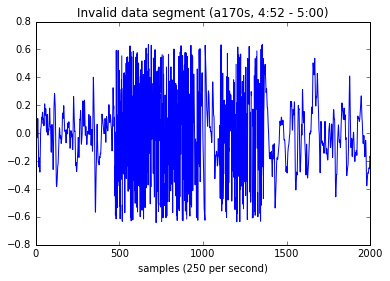

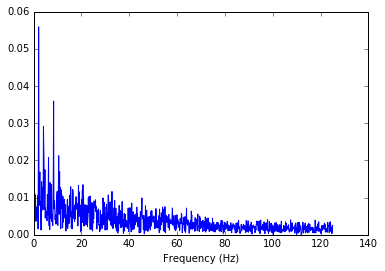

Valid data


In [138]:
sig, fields=wfdb.rdsamp('sample_data/challenge_training_data/a170s')
fs = 250
start = 292
end = 300
duration = end - start

signal = sig[start*fs:end*fs,:]

plt.plot(signal[:,1],'b-')
plt.title('Invalid data segment (a170s, 4:52 - 5:00)')
plt.xlabel('samples (250 per second)')
plt.show()

xf, signal_fft = get_signal_fft(signal, duration)
plot_signal_fft(xf, signal_fft)
print check_frequency_amplitude_limits(signal_fft, duration)